In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

In [5]:
# let's import data from SQL server
DB = 'movies'
SERVER = 'DESKTOP-DAJTK6L\SQLEXPRESS'
DRIVER = '{ODBC Driver 17 for SQL Server}'
connection = pyodbc.connect(f'DRIVER={DRIVER};SERVER={SERVER};DATABASE={DB};Trusted_Connection=yes;')

query = 'SELECT * FROM movies_data WHERE budget IS NOT NULL AND gross IS NOT NULL'

df = pd.read_sql(query, connection)

C:\Users\jakub\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [25]:
# describe the dataset
df.describe()

,movie_year,score,votes,budget,gross,runtime
count,5436.000000,5436.000000,5.436000e+03,5.436000e+03,5.436000e+03,5435.000000
mean,2001.651582,6.392642,1.149110e+05,3.593864e+07,1.030045e+08,108.156394
std,10.541791,0.963200,1.842255e+05,4.154770e+07,1.871051e+08,18.121401
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.067412e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.671199e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.119478e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


array([[<AxesSubplot:title={'center':'movie_year'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'runtime'}>]], dtype=object)

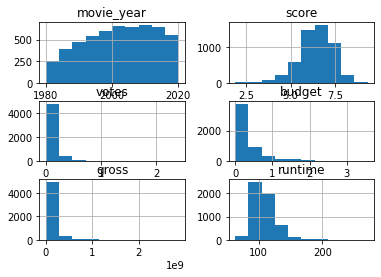

In [26]:
# visualization of data in dataset
df.hist()


In [32]:
# Question: Which movie has highest budget?
data = df[['movie_name', 'budget']]
data.sort_values(by='budget', ascending=False)

# Avengers: Endgame has highest budget

,movie_name,budget
5316,Avengers: Endgame,356000000.0
5172,Avengers: Infinity War,321000000.0
5069,Star Wars: Episode VIII - The Last Jedi,317000000.0
5060,Justice League,300000000.0
3429,Pirates of the Caribbean: at World's End,300000000.0
...,...,...
1237,The Living End,22769.0
3478,Paranormal Activity,15000.0
2981,Primer,7000.0
1160,El Mariachi,7000.0


<function matplotlib.pyplot.show(close=None, block=None)>

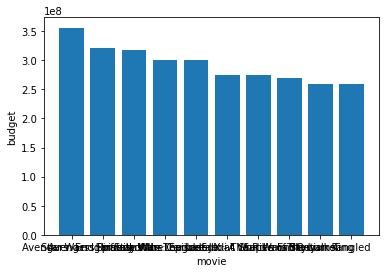

In [31]:
# visualization of top ten movies by budget
data = df[['movie_name', 'budget']].sort_values(by='budget', ascending=False).head(10)
plt.bar(x=data['movie_name'], height=data['budget'])
plt.xlabel('movie')
plt.ylabel('budget')
plt.show

In [37]:
# gross by company and year
data = df[['company', 'gross']]
result = data.groupby('company').sum()
result.sort_values(by='gross', ascending=False)

,gross
company,
Warner Bros.,5.477320e+10
Universal Pictures,5.124111e+10
Columbia Pictures,4.235643e+10
Paramount Pictures,4.002170e+10
Twentieth Century Fox,3.954257e+10
...,...
.406 Production,1.058000e+04
Enderby Entertainment,8.315000e+03
Two Prong Lesson,5.073000e+03


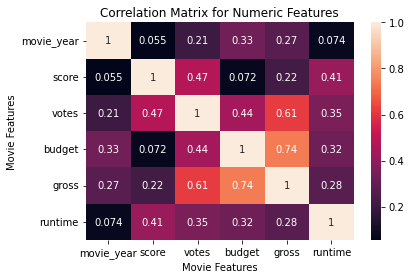

In [10]:
# Find a correlation with gross
corr_matrix = df.corr()

# visualisation of correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
# there we can see that gross and votes has high correlation with gross

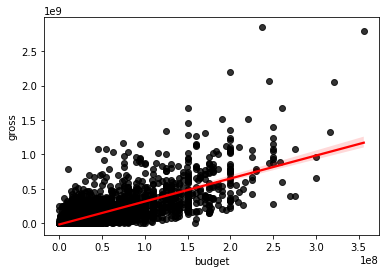

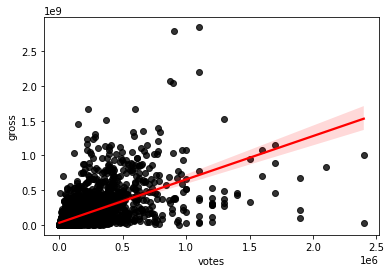

In [13]:
# show relationship between budget and gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

# show relationship between budget and gross
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

In [14]:
# Construct linear regression model for budget and gross
X_train, X_test, y_train, y_test = train_test_split(df['budget'], df['gross'])

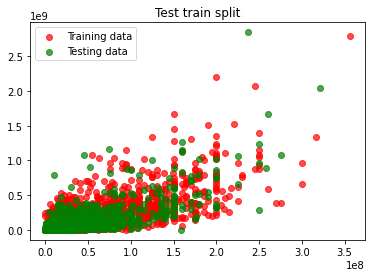

In [15]:
# Test train split visualization
plt.scatter(X_train, y_train, label='Training data', color='r', alpha=0.7)
plt.scatter(X_test, y_test, label='Testing data', color='g', alpha=0.7)
plt.legend()
plt.title("Test train split")
plt.show()

In [17]:
# Create linear model and train it
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

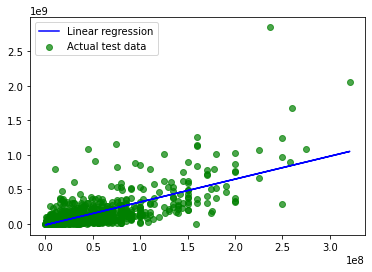

In [18]:
# Use model to predict on Test data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plot prediction line against actual test data
plt.plot(X_test, prediction, label="Linear regression", color='b')
plt.scatter(X_test, y_test, label="Actual test data", color='g', alpha=0.7)
plt.legend()
plt.show()

In [21]:
# Predict gross for movie with budget = 19000000.0
movie_budget = 19000000.0
LR.predict(np.array([[movie_budget]]))[0]

46646624.83184891

In [22]:
# Score linear regression model 
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.5326308094012826

In [47]:
# Multiple regression 
X = df[['budget', 'votes']]
y = df['gross']

regr = LinearRegression()
regr.fit(X.values,y.values)

# predticton the gross of movie where budget is 19000000 and votes is 54000
gross_predict = regr.predict([[19000000, 54000]])
print(gross_predict)

[36380563.05467497]


In [49]:
# Multiple regression coeficient
regr.coef_
print(f'if budget increases by 1 gross increases by {regr.coef_[0]} and if the votes increases by 1 gross increases by {regr.coef_[1]} ')

if budget increases by 1 gross increases by 2.6238152361307345 and if the votes increases by 1 gross increases by 364.1382298721914 


In [51]:
# Let's test coeffficient. Let's increase votes 10000. According to coef the gross should be approximately by 3,6 million higher
gross_predict = regr.predict([[19000000, 64000]])
gross_predict_old = regr.predict([[19000000, 54000]])
increase = gross_predict - gross_predict_old
print(gross_predict)
print(increase)

# There we can see that coefficient for votes is correct

[40021945.35339688]
[3641382.29872191]
